In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


from sklearn.preprocessing import StandardScaler

import seaborn as sns



In [2]:
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-20-23 No Fluff\df_All_Avg.csv")

df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDCA.csv")
#df_All = pd.read_csv('/workspaces/codespaces-jupyter/ProjectrC4/df_AlConCD554.csv')

FScore = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\FScore_on_Butanol.csv")


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
print(df_All.describe())

            Butanol       425 %Al       TC55552       DI55102       FC55569  \
count  56692.000000  56692.000000  56692.000000  56692.000000  56692.000000   
mean      10.159097      6.102568    167.848708      0.929183   6542.683482   
std       10.766912      0.307167     15.014702      0.066439    380.329468   
min        0.010000      4.573810    119.869000      0.794535   5096.080000   
25%        3.725195      5.969493    156.235000      0.889793   6295.522500   
50%        5.920780      6.120565    170.625000      0.938533   6529.010000   
75%       11.642100      6.267622    179.313000      0.979955   6767.337500   
max       60.346700      7.571230    207.426000      1.068230   8014.950000   

            DI55152       FC55576       TI55017       FC42428      AYC55580  \
count  56692.000000  56692.000000  56692.000000  56692.000000  56692.000000   
mean       0.948213    423.616848    186.704144  34949.282507     11.190763   
std        0.043248    260.435270      9.778964   5

In [5]:
# # List of columns to exclude to run XGboost feature selection
# exclude_columns = ['Date', 'Decanol']

# # Create a new DataFrame without the excluded columnsd
# df_All = df_All.drop(columns=exclude_columns)

     Feature  Importance
19   TC55555       126.0
18  FFC55555       157.0
17   TI55021       166.0
16   FC55003       179.0
15   LC55553       189.0
14   FC55009       194.0
13   LC55555       203.0
12   LC55557       208.0
11   TI55023       216.0
10   FC42428       226.0
9   FFC55553       229.0
8    FC55555       275.0
7    TI55017       288.0
6    FC55576       293.0
5   AYC55580       307.0
4    FC55569       324.0
3    DI55152       331.0
2    DI55102       372.0
1    TC55552       470.0
0    425 %Al       605.0
Training features: 20, Testing features: 20
Iteration for dropping feature 'None' is complete.


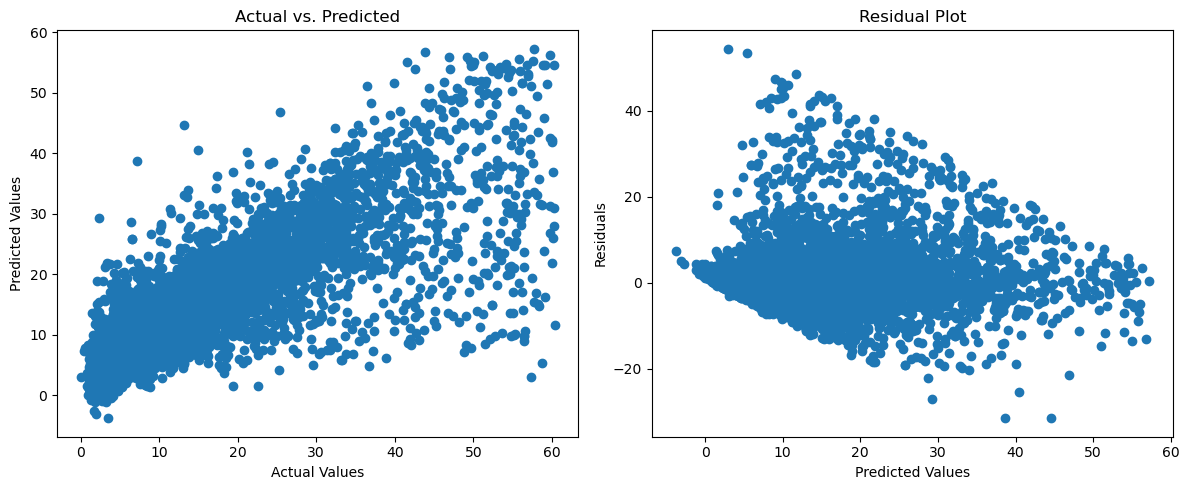

Training features: 19, Testing features: 19
Iteration for dropping feature 'TC55555' is complete.


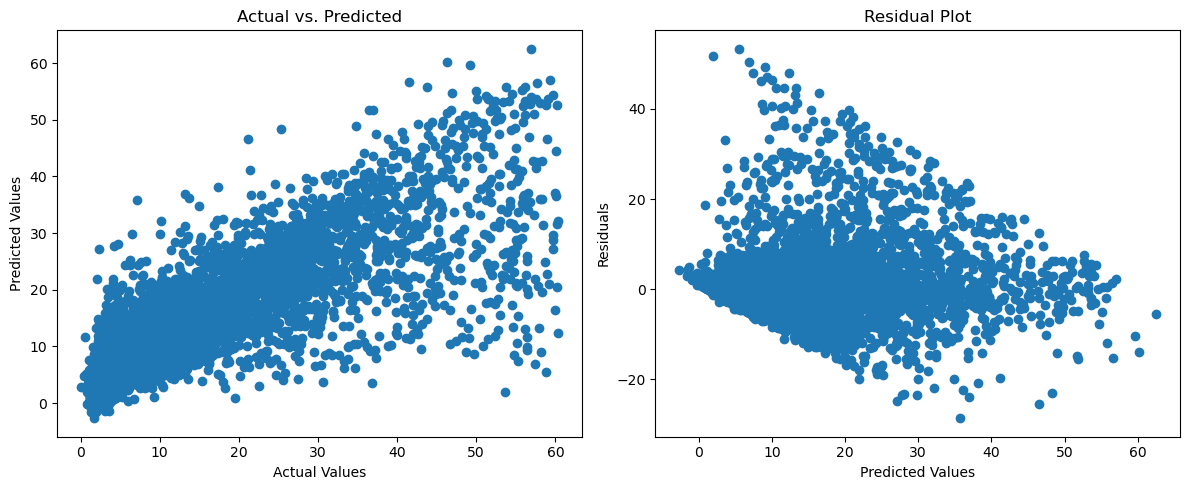

Training features: 18, Testing features: 18
Iteration for dropping feature 'TI55021' is complete.


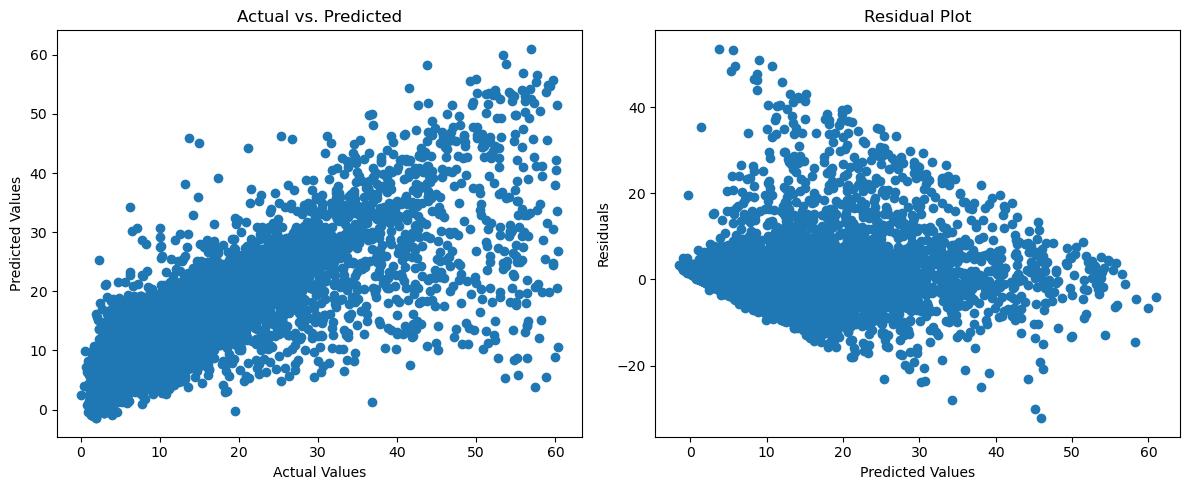

Training features: 17, Testing features: 17
Iteration for dropping feature 'FC55003' is complete.


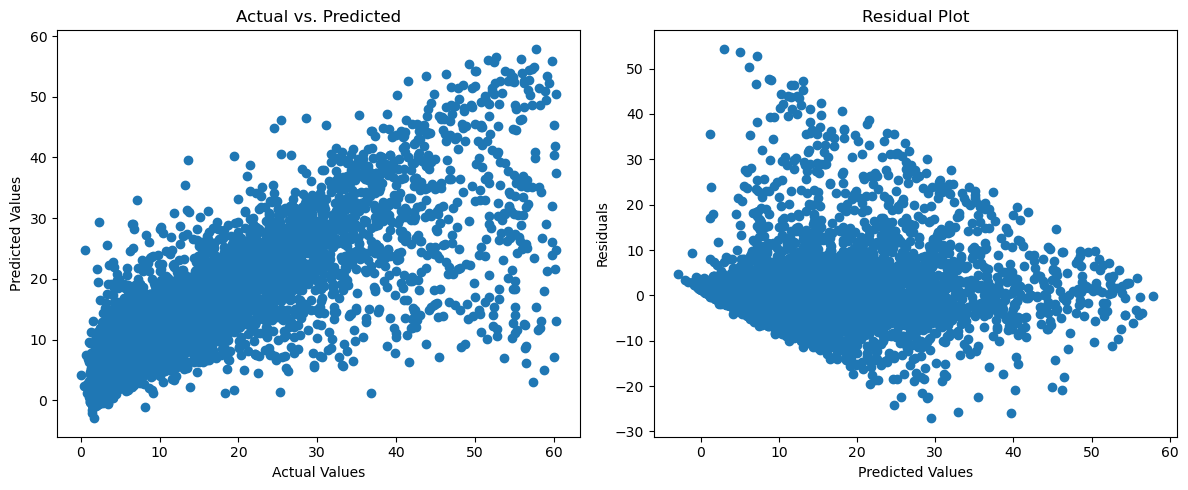

Training features: 16, Testing features: 16
Iteration for dropping feature 'LC55553' is complete.


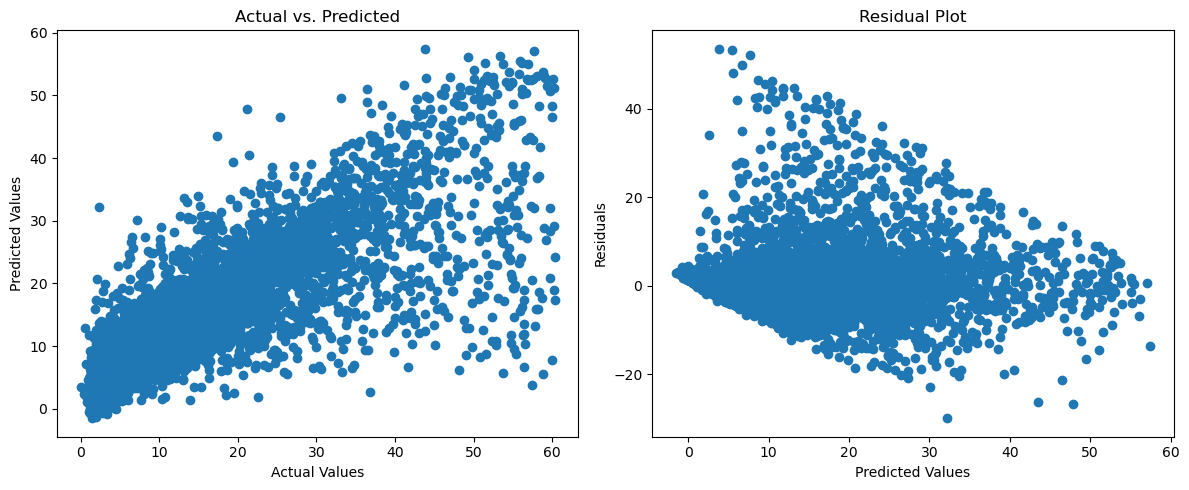

Training features: 15, Testing features: 15
Iteration for dropping feature 'FC55009' is complete.


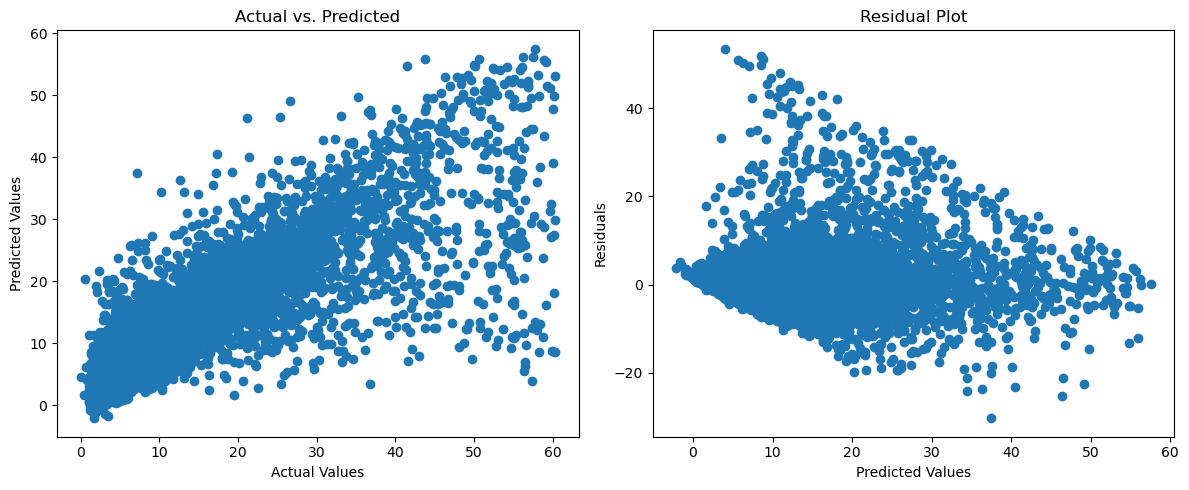

Training features: 14, Testing features: 14
Iteration for dropping feature 'LC55555' is complete.


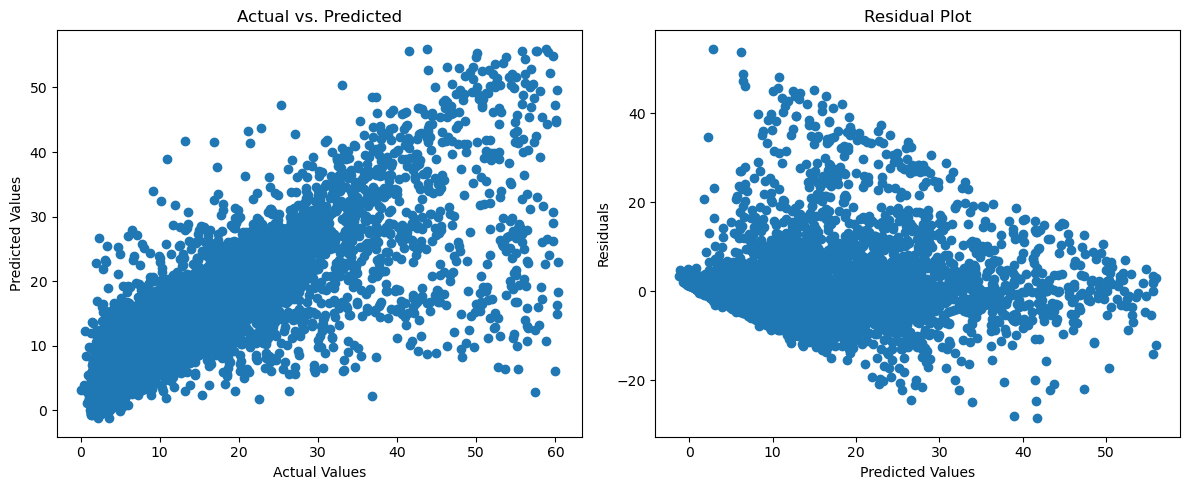

Training features: 13, Testing features: 13
Iteration for dropping feature 'LC55557' is complete.


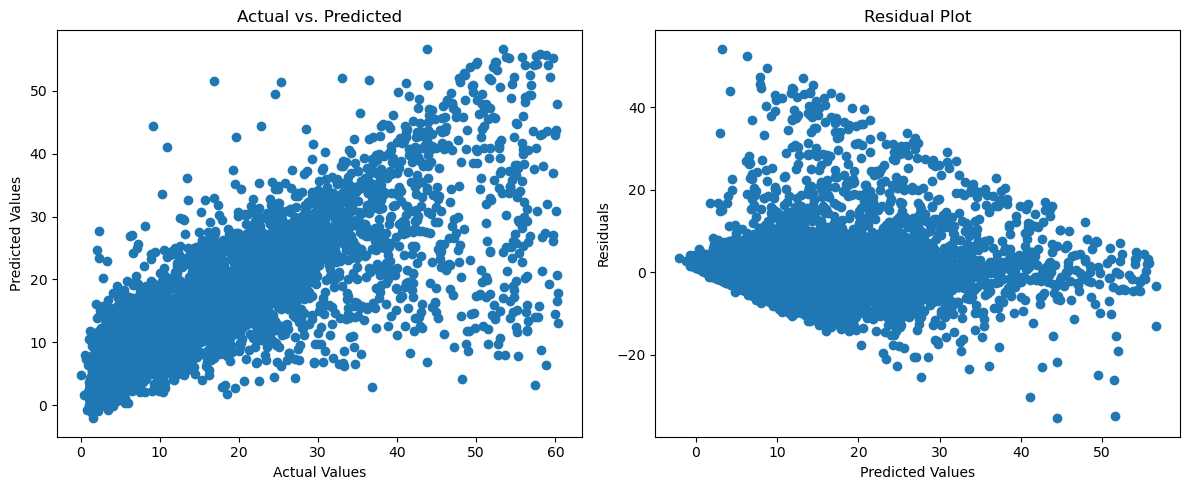

Training features: 12, Testing features: 12
Iteration for dropping feature 'TI55023' is complete.


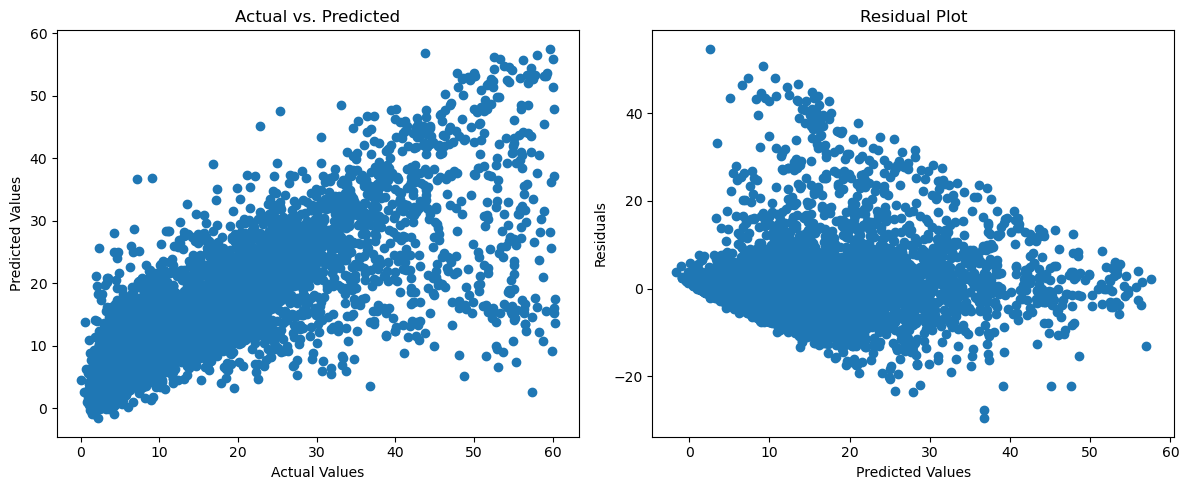

Training features: 11, Testing features: 11
Iteration for dropping feature 'FC42428' is complete.


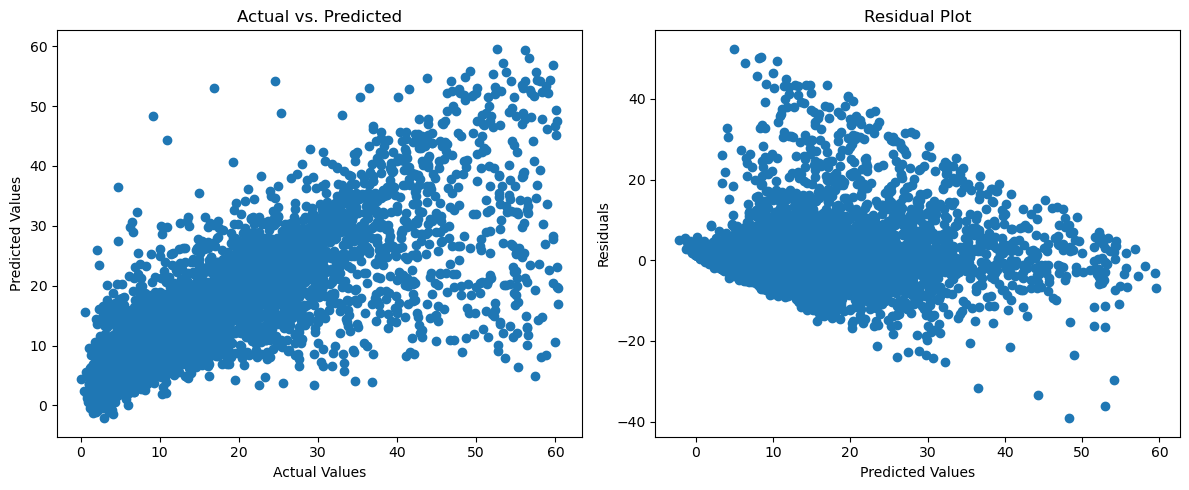

Training features: 10, Testing features: 10
Iteration for dropping feature 'FFC55553' is complete.


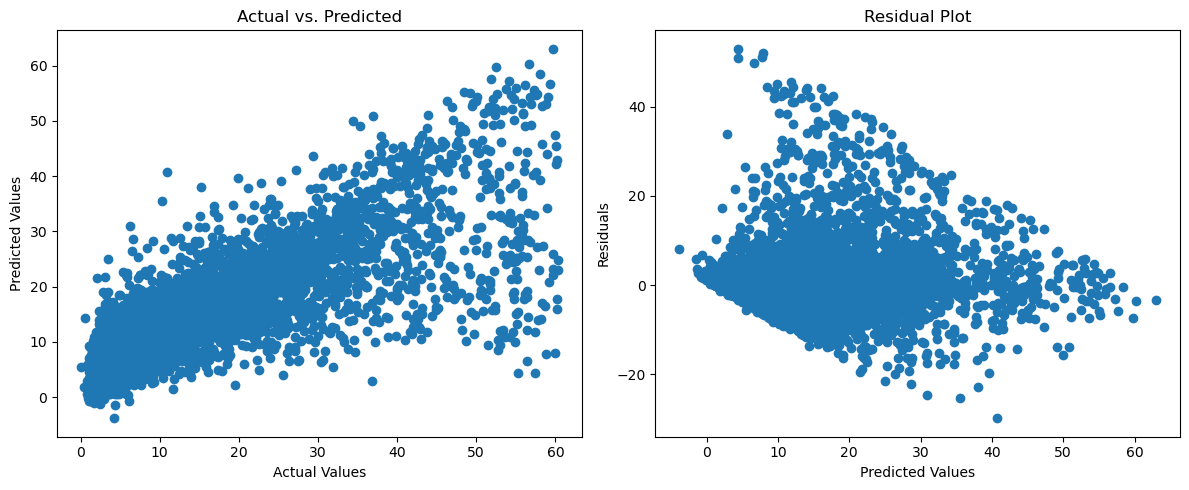

Training features: 9, Testing features: 9
Iteration for dropping feature 'FC55555' is complete.


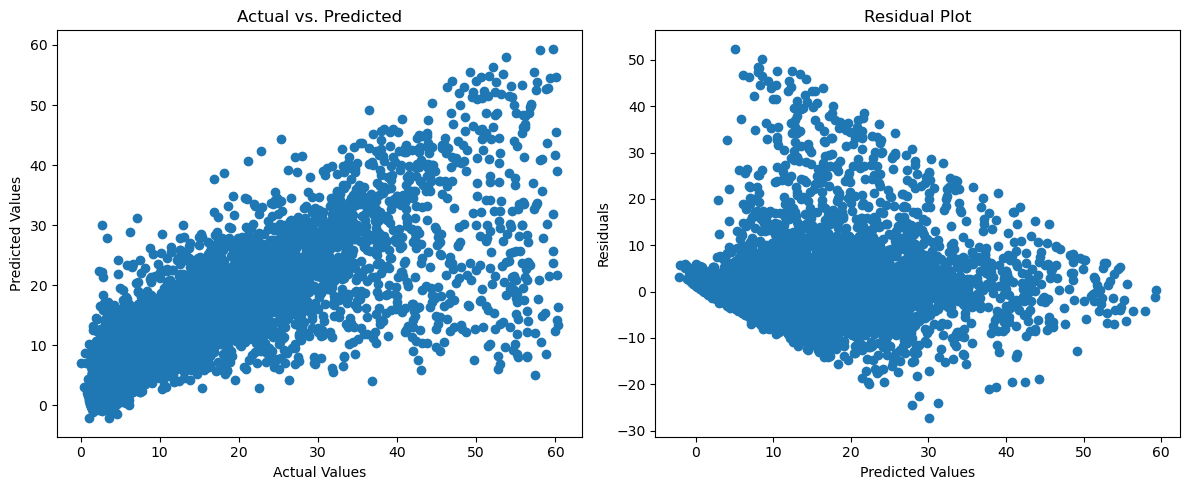

Training features: 8, Testing features: 8
Iteration for dropping feature 'TI55017' is complete.


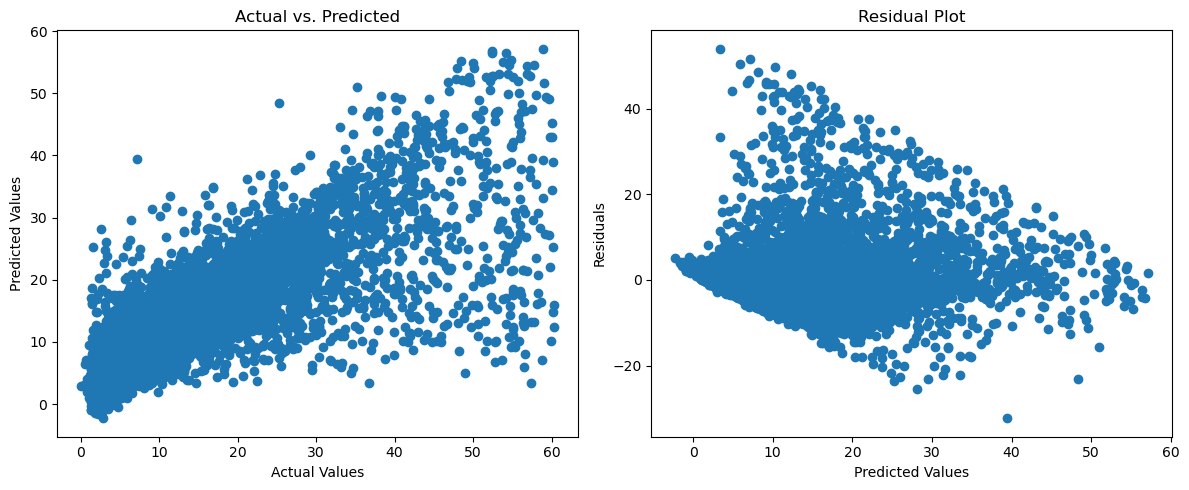

Training features: 7, Testing features: 7
Iteration for dropping feature 'FC55576' is complete.


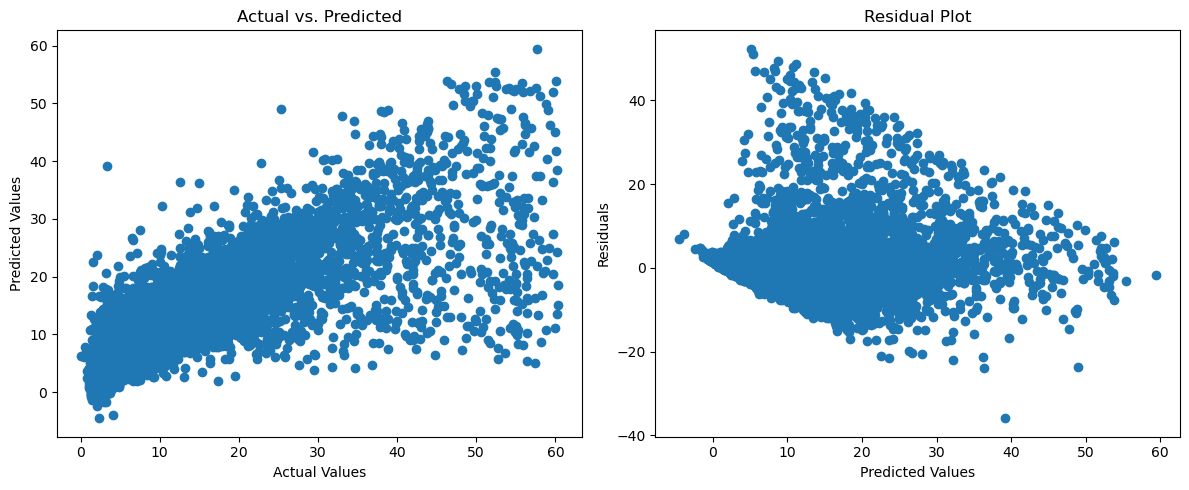

Training features: 6, Testing features: 6
Iteration for dropping feature 'AYC55580' is complete.


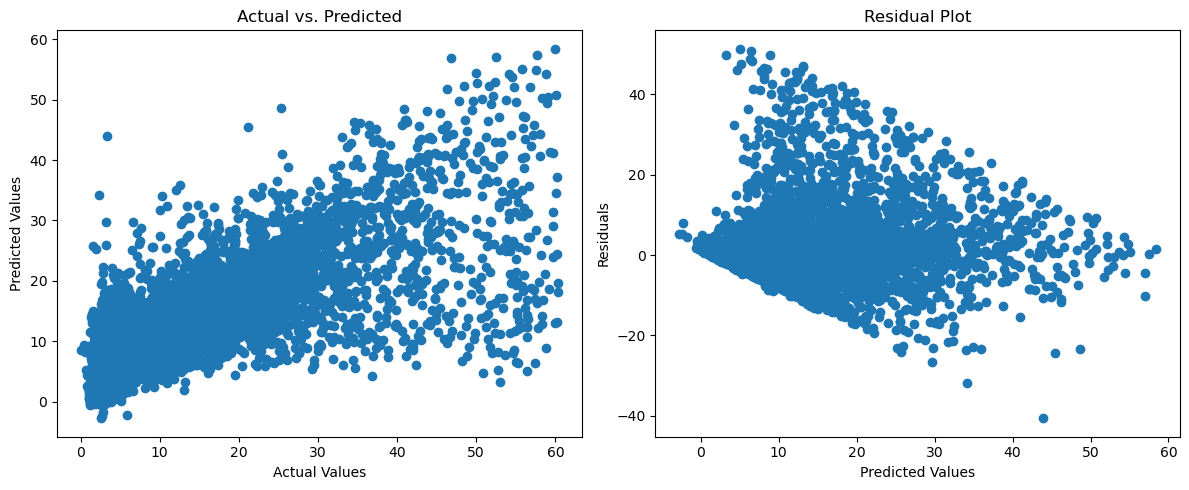

Training features: 5, Testing features: 5
Iteration for dropping feature 'FC55569' is complete.


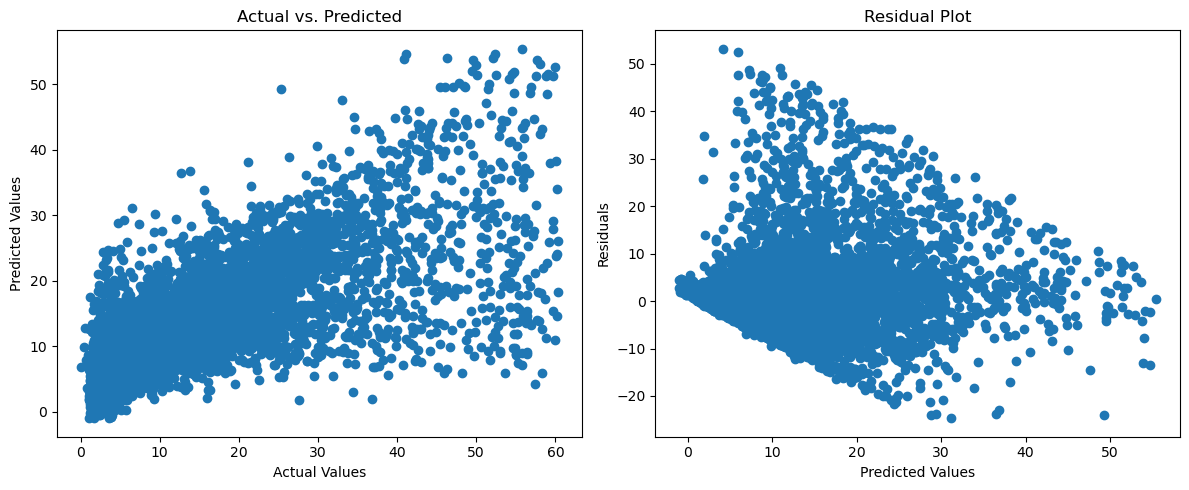

Training features: 4, Testing features: 4
Iteration for dropping feature 'DI55152' is complete.


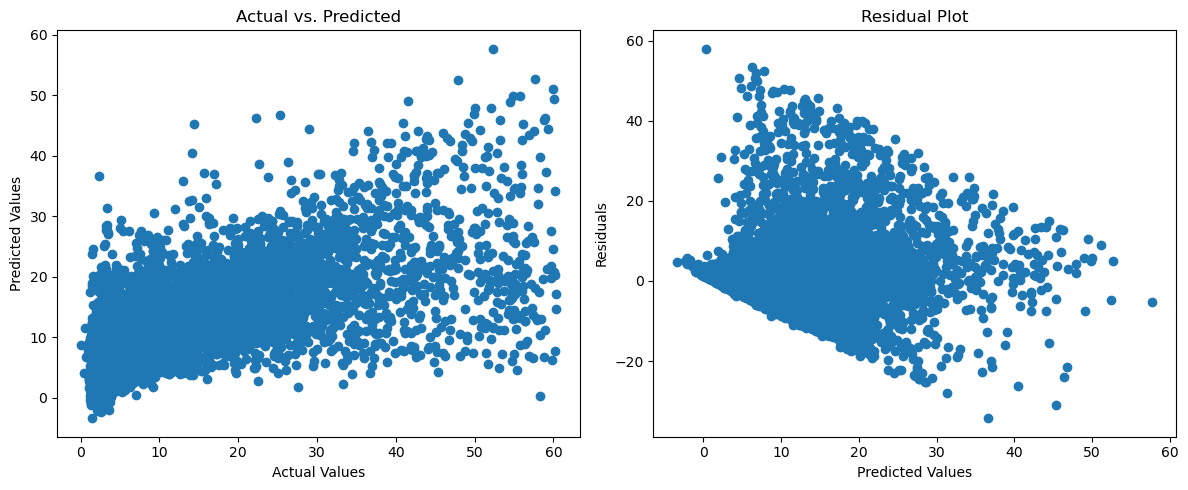

Training features: 3, Testing features: 3
Iteration for dropping feature 'DI55102' is complete.


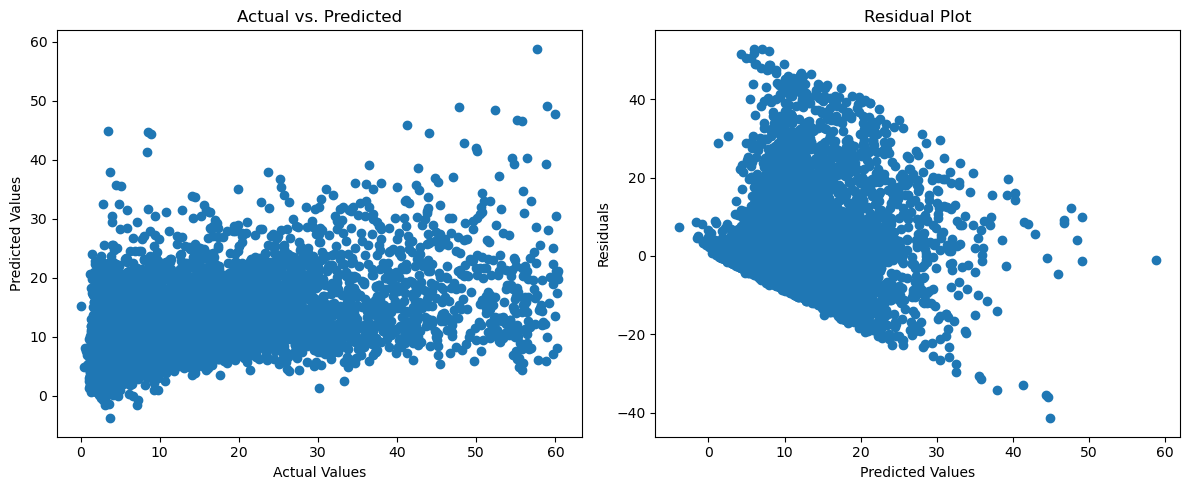

Training features: 2, Testing features: 2
Iteration for dropping feature 'TC55552' is complete.


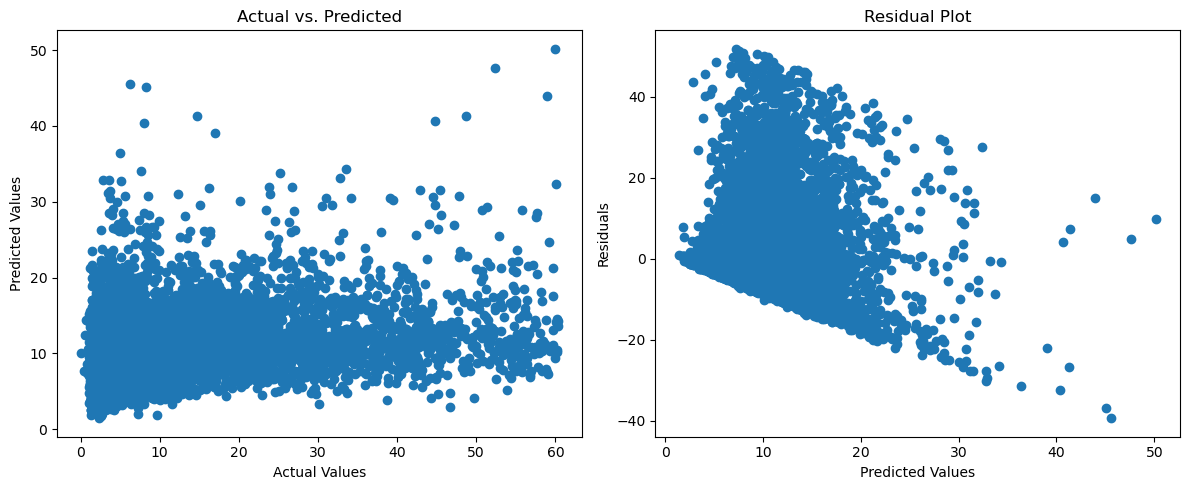

Training features: 1, Testing features: 1
Iteration for dropping feature '425 %Al' is complete.


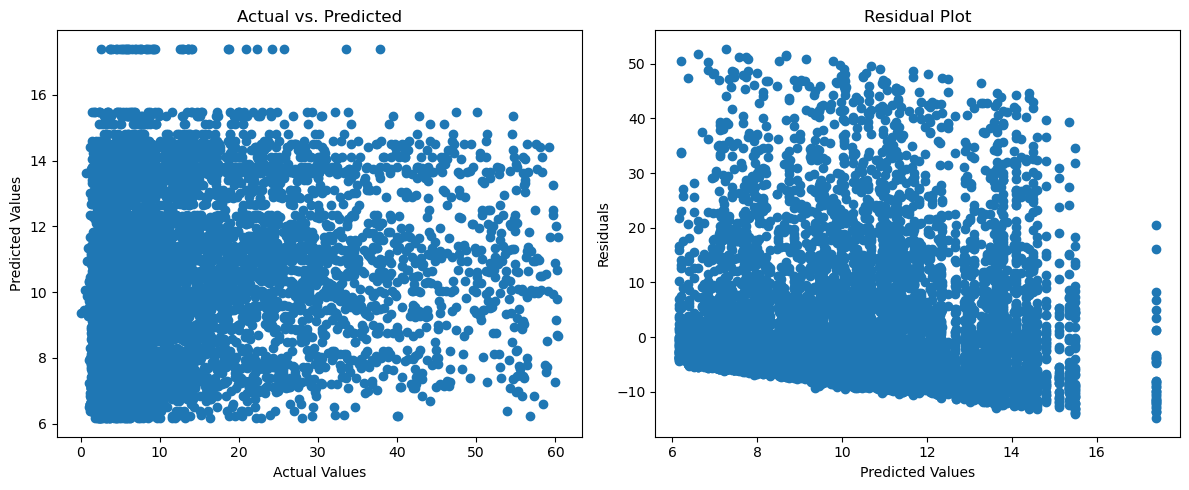

   Dropped_Feature         MSE        R2       RMSE
0             None   31.661372  0.732135   5.626844
1          TC55555   31.151232  0.736451   5.581329
2          TI55021   30.893527  0.738631   5.558195
3          FC55003   31.194418  0.736085   5.585196
4          LC55553   31.065418  0.737177   5.573636
5          FC55009   31.285268  0.735317   5.593324
6          LC55555   32.673331  0.723573   5.716059
7          LC55557   32.556046  0.724566   5.705791
8          TI55023   32.338366  0.726407   5.686683
9          FC42428   32.405825  0.725837   5.692611
10        FFC55553   32.392511  0.725949   5.691442
11         FC55555   35.658519  0.698318   5.971475
12         TI55017   37.058257  0.686476   6.087549
13         FC55576   39.098693  0.669213   6.252895
14        AYC55580   43.250277  0.634089   6.576494
15         FC55569   46.978499  0.602547   6.854086
16         DI55152   59.346028  0.497914   7.703637
17         DI55102   82.719790  0.300165   9.095042
18         T

In [8]:
# Assuming df_All is your data
X = df_All.drop(columns='Butanol')  # Assuming 'Butanol' is the name of your Butanol variable
y = df_All['Butanol']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Sort the FScore dataframe
FScore = FScore.sort_values(by='Importance')
print(FScore)

# Exclude 'FFC55555' from the list of features to drop
features_to_drop = ['None'] + FScore[FScore['Feature'] != 'FFC55555']['Feature'].tolist()



results = []

current_features = X.columns.tolist()

for feature in features_to_drop:
    
    if feature != 'None' and feature in current_features:
        current_features.remove(feature)

    # Get the indices of the current features
    feature_indices = [X.columns.get_loc(f) for f in current_features]

    # Subset the scaled datasets
    X_train_iteration = X_train_scaled[:, feature_indices]
    X_test_iteration = X_test_scaled[:, feature_indices]

    # Check shapes
    print(f"Training features: {X_train_iteration.shape[1]}, Testing features: {X_test_iteration.shape[1]}")
    assert X_train_iteration.shape[1] == X_test_iteration.shape[1], "Feature mismatch between training and testing sets"

    # Initialize and train the XGBoost Regressor on the scaled data
    xgb_model = xgb.XGBRegressor(
                                objective ='reg:squarederror',
                                n_estimators=500,

)

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    xgb_model.fit(X_train_iteration, y_train)
    
    
    y_pred = xgb_model.predict(X_test_iteration)
    
    # Record performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append([feature, mse, r2, rmse])
    print(f"Iteration for dropping feature '{feature}' is complete.")
    
    
    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Actual vs. Predicted
    ax[0].scatter(y_test, y_pred)
    ax[0].set_xlabel('Actual Values')
    ax[0].set_ylabel('Predicted Values')
    ax[0].set_title('Actual vs. Predicted')

    # Residual Plot
    residuals = y_test - y_pred
    ax[1].scatter(y_pred, residuals)
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Residuals')
    ax[1].set_title('Residual Plot')
    
    plt.tight_layout()
    plt.show()

# Convert results into a dataframe
results_df = pd.DataFrame(results, columns=['Dropped_Feature', 'MSE', 'R2', 'RMSE'])
print(results_df)